
# Analysis of Spotify: Listening Patterns In the US and Across the World


## Project Outline
1) Introduction and Motivation
2) Methods
3) API Acquisition 
4) Visualization and Analysis for Global Top 50 Playlist
5) Visualization and Analysis for United States Top 50 Playlist
6) Personal Analysis
7) Conclusions and Discussion 
8) References 

## 1) Introduction and Motivation 

All around the world people are connected by music. It gives everyone a way to express themselves and brings people together. In today's society people listen to music in many different circumstances in which their music preferences may change. Between walking to class, working out at the ARC, or studying in the library, you are bound to see a large number of individuals with headphones on listening to a variety of different music. Music has the ability to highten experiences, set the tone, and change the mood. Our analysis project aimed to discover what makes music popular and if there are any differences in popular music between the United States and Globally. 



## 2) Methods  
Since we all regularly use spotify to listen to music, we obtained the spotify API (called Spotipy) to gain access to a wide range of data. We were able to access complex data from the Global top 50 songs and the US top 50 songs on spotify. We completed two seperate analyses on these two playlists and then compared trends found in each one. 

Within the avaliable data for both playlists we found audio features of the songs, allowing us to determine characteristics that made these songs popular. This was the approach we took to determine the “qualities” of music that people find the most entertaining thus making these songs popular. We also looked at the correlation between all of the audio features to determine the likelihood of a feature being present based off of the presence of another feature. 

We compared listening trends between the global top 50 and the US top 50 by looking at artist frequency in the top 50, genre frequency, and track popularity based on genre. We also were able to visulaize the songs and artists that appeared in both playlists to see how similar the top 50 globally is to the top 50 in the US. 



## 3) API Acquisition 

We were able to use the spotipy python module that is provided by spotify. This allowed us to access the spotipy API which is well documented and allowed us to access information about songs and certain information about personal user profiles. We had to request persmission from spotify to create a project using the spotify developers page. We were then given a client ID number as well as client secret number through the spotify app that allowed us to have access to the data.  

In [279]:
#importing packages used throughout the project
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

In [280]:
#Authentication for spotify API using our obtained client id and client secret 
client_credentials_manager = SpotifyClientCredentials(client_id='9b436bfad3ef429d924e3d07fdad8d74', client_secret='3efb51b6ffb346889d452f04a5af36e0')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## 4) Visualization and Analysis for Global Top 50 Playlist 

In order to reach our goals for the project, we began by getting data from the Top 50 Global Songs playlist created by Spotify. The live playlist updates every week with the new top songs across the world. Using the spotipy documentation, we determined the varibles that were of our interest and put them into a data frame. The varibles that we decided to use were track name, track popularity, artist, artist popularity, genre, album name, and song uri. The song uri's were not used for any analysis, but were used for accessing song information. 

In [370]:
#accessing link for the top 50 global songs 
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [371]:
#creates empty lists to store information for each variable we wanted from spotipy 
track_uri = []
track_name = []
artist_uris = []
artist_name = []
artist_pop = []
artist_genres = []
album = []
track_pop = []

#for loop to find information for each song in the top 50 playlist 
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri.append(track["track"]["uri"])
    
    #Track name
    track_name.append(track["track"]["name"])
    
    #Main Artist
    artist_uris.append(track["track"]["artists"][0]["uri"])
    artist_uri=track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name.append(track["track"]["artists"][0]["name"])
    artist_pop.append(artist_info["popularity"])
    artist_genres.append(artist_info["genres"])
    
    #Album
    album.append(track["track"]["album"]["name"])
    
    #Popularity of the track
    track_pop.append(track["track"]["popularity"])
    
    
    

In [372]:
#gets the top 50 tracks globally with the artist, track popularity, artist popularity, genre, 
#album name, and uri
tracks=pd.DataFrame({
    "track name": track_name,
    "track popularity": track_pop,
    "artist(s)": artist_name,
    "artist populatrity": artist_pop,
    "genre(s)": artist_genres,
    "album name": album,
    "uri": track_uri
})
tracks.head()

,track name,track popularity,artist(s),artist populatrity,genre(s),album name,uri
0,Flowers,100,Miley Cyrus,92,[pop],Flowers,spotify:track:0yLdNVWF3Srea0uzk55zFn
1,TQG,92,KAROL G,94,"[reggaeton, reggaeton colombiano, urbano latino]",MAÑANA SERÁ BONITO,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf
2,Die For You - Remix,92,The Weeknd,99,"[canadian contemporary r&b, canadian pop, pop]",Die For You (Remix),spotify:track:7oDd86yk8itslrA9HRP2ki
3,Kill Bill,93,SZA,95,"[pop, r&b]",SOS,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
4,Boy's a liar Pt. 2,94,PinkPantheress,85,[],Boy's a liar Pt. 2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv


After getting general information we were able to access audio features of all the songs in the global top 50. We were curious to see what audio features make songs popular.  We were able to do so by finding the audio features by song.

In [373]:
#gets audio features for the top 50 songs using spotipy package audio features 
var=pd.DataFrame.from_dict(sp.audio_features(track_uris))
var.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
1,0.720,0.630,4,-3.547,0,0.2770,0.6730,0.000000,0.0936,0.607,179.974,audio_features,0DWdj2oZMBFSzRsi2Cvfzf,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,https://api.spotify.com/v1/tracks/0DWdj2oZMBFS...,https://api.spotify.com/v1/audio-analysis/0DWd...,199440,4
2,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,audio_features,7oDd86yk8itslrA9HRP2ki,spotify:track:7oDd86yk8itslrA9HRP2ki,https://api.spotify.com/v1/tracks/7oDd86yk8its...,https://api.spotify.com/v1/audio-analysis/7oDd...,232857,4
3,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
4,0.696,0.809,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4


The table above shows the audio features of each song, by song. Instead of using all of the variables, we chose to focus on the variables that are on a 0 to 1 scale. These variables are: danceability, energy, speechiness, acousticness, instrumentalness, liveness, and valence. Here are the definitions for the audio features that we chose to use in our
analysis.

#### Danceability: 
The ease at which a person could dance to a song for the entire song (how suitable the song is for dancing)
#### Energy: 
Measures intensity and activity. For example, metal has high energy. 
#### Speechiness:
Detects the presence of spoken words in a track.
#### Acousticness:
Acousticness is a measure of confidence that a song is acoustic.
#### Instrumentalness:
Detects whether a song has no vocals.
#### Liveness:
This audio features detects the presence of an audience within a track.
#### Valence:
The positiveness of a track.

These variables are measured on a 0-1 scale. Because of this, we were able to take the averages and do to-scale analysis. This also made these audio features suitable for comparsion. As a rule of thumb, anything above 0.66 is considered high, and below 0.33 is considered low. For example, an instrumentalness of 0.7 is considered highly instrumental, which implies that there is a low level of vocals. 

We then found the spearman rank correlation between the different audio features to determine if there were any obvious correlations between them. 

In [374]:
nums=var.iloc[:, : 11]

#dropping mode and key because we are not interested in these variables 
nums= nums.drop(columns=['mode', 'key'])

#Use spearman to find correlation based on ranks 
nums=nums.corr(method = "spearman")
nums

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.109417,0.156805,0.490635,-0.154988,-0.014650,-0.196571,0.294167,-0.041783
energy,0.109417,1.000000,0.534710,-0.175531,-0.080061,0.149482,0.117901,0.379935,-0.021611
loudness,0.156805,0.534710,1.000000,-0.083890,0.114195,-0.251948,-0.126050,0.310019,0.020024
speechiness,0.490635,-0.175531,-0.083890,1.000000,-0.164810,-0.142116,-0.072845,-0.009748,0.143818
acousticness,-0.154988,-0.080061,0.114195,-0.164810,1.000000,-0.124682,0.006915,0.075732,0.104879
instrumentalness,-0.014650,0.149482,-0.251948,-0.142116,-0.124682,1.000000,0.082252,-0.124042,-0.131240
liveness,-0.196571,0.117901,-0.126050,-0.072845,0.006915,0.082252,1.000000,-0.014358,-0.179256
valence,0.294167,0.379935,0.310019,-0.009748,0.075732,-0.124042,-0.014358,1.000000,0.245768
tempo,-0.041783,-0.021611,0.020024,0.143818,0.104879,-0.131240,-0.179256,0.245768,1.000000


From both the correlation matrix above and the visualization below we can see that dancability and speachiness and energy and loudness were the features that were most highly correlated. 

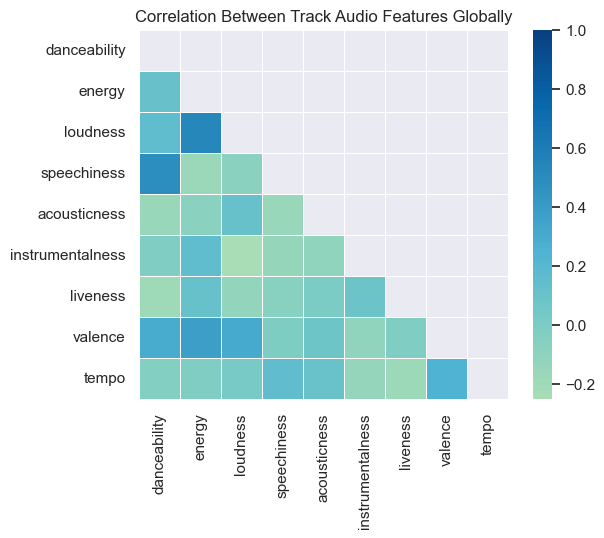

In [375]:
#making a correlation matrix 
sns.set_theme(style="darkgrid", palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
corrMatrix = nums
sns.heatmap(corrMatrix, cmap="GnBu",mask=mask,vmax=1, center=0,
            square=True, linewidths=.5).set(title="Correlation Between Track Audio Features Globally");
plt.show()

Next we merged our basic song information data frame with the audio feature data frame based on song uri. We can now see our finalized data frame with both song information and audio feature information. 

In [380]:
#merges the two datasets based on the song uri 
final = pd.merge(tracks,var, how = "left", on = "uri")

#resets the index to start at zero 
final.index= final.index + 1

#finding the names of all columns given from spotipy audio features 
final.columns.values

array(['track name', 'track popularity', 'artist(s)',
       'artist populatrity', 'genre(s)', 'album name', 'uri',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'], dtype=object)

In [381]:
#getting rid of columns that are not of interest 
final=final.drop(['type','id','track_href','analysis_url'],axis=1)

#indexing based on the current most played tracks in the US
final.reset_index(inplace=True)
final = final.rename(columns = {'index':'Global Rank'})
final = final.set_index("Global Rank")
final

,track name,track popularity,artist(s),artist populatrity,genre(s),album name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Global Rank,,,,,,,,,,,,,,,,,,,,
1,Flowers,100,Miley Cyrus,92,[pop],Flowers,spotify:track:0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,200455,4
2,TQG,92,KAROL G,94,"[reggaeton, reggaeton colombiano, urbano latino]",MAÑANA SERÁ BONITO,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,0.720,0.630,4,-3.547,0,0.2770,0.67300,0.000000,0.0936,0.6070,179.974,199440,4
3,Die For You - Remix,92,The Weeknd,99,"[canadian contemporary r&b, canadian pop, pop]",Die For You (Remix),spotify:track:7oDd86yk8itslrA9HRP2ki,0.531,0.525,1,-6.500,0,0.0671,0.23200,0.000000,0.4410,0.5020,66.900,232857,4
4,Kill Bill,93,SZA,95,"[pop, r&b]",SOS,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,0.1610,0.4180,88.980,153947,4
5,Boy's a liar Pt. 2,94,PinkPantheress,85,[],Boy's a liar Pt. 2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,0.696,0.809,5,-8.254,1,0.0500,0.25200,0.000128,0.2480,0.8570,132.962,131013,4
6,"Shakira: Bzrp Music Sessions, Vol. 53",96,Bizarrap,90,"[argentine hip hop, pop venezolano, trap argen...","Shakira: Bzrp Music Sessions, Vol. 53",spotify:track:4nrPB8O7Y7wsOCJdgXkthe,0.778,0.632,2,-5.600,0,0.0493,0.27400,0.000000,0.0915,0.4980,122.104,218289,4
7,Creepin' (with The Weeknd & 21 Savage),94,Metro Boomin,92,[rap],HEROES & VILLAINS,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.41700,0.000000,0.0822,0.1720,97.950,221520,4
8,As It Was,89,Harry Styles,92,[pop],Harry's House,spotify:track:4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,167303,4
9,Yandel 150,85,Yandel,84,"[latin hip hop, reggaeton, urbano latino]",Resistencia,spotify:track:4FAKtPVycI4DxoOHC01YqD,0.783,0.729,6,-3.549,0,0.0691,0.04920,0.000272,0.1000,0.5800,167.968,216148,4


We wanted to determine how frequent artists were within the top 50. Using natural processing language we found that KAROL G had the most songs in the top 50 globally at 3 songs. In addition there were 42 unique artists with popular songs.

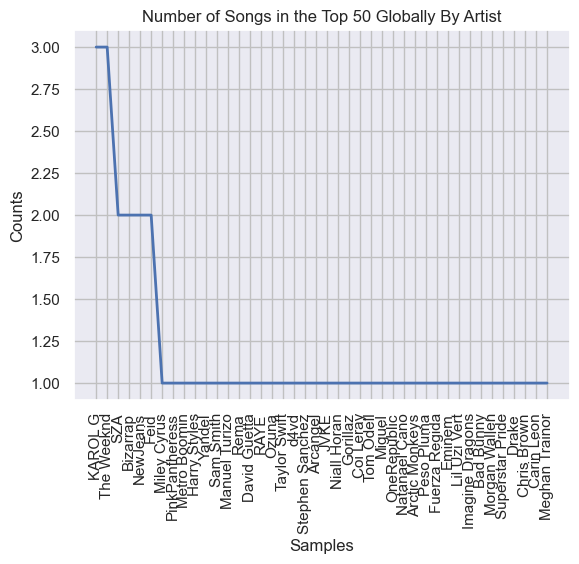

In [327]:
art=final["artist(s)"]


#plotting the frequency of the words in the first 20 sentences
frequency= nltk.FreqDist(name for name in art)
%matplotlib inline

#printing out the frequency of the top 50 words used, every other word is only used once 
frequency.plot(title='Number of Songs in the Top 50 Globally By Artist')
sns.set(font_scale=.7)



In [295]:
#42 different artists have songs in the top 50 globally 
print(len(final["artist(s)"].unique()))

42


We were also curious to see if certain genres were popular within the top 50. The genre variable given using the spotipy package classified each song into multiple genres. To simplify our analysis, we created a for loop to catagorize them in a more exclusive way. We then added the new classification of genre as a column in our data frame so we could run genre analysis.

In [390]:
def simplify_genre(genre_list):
    for i in range(0, len(genre_list)):
        genres_of_song = []
        for genres in genre_list[i]:
            genres_of_song.append(genres.split())
        word_list = [item for sublist in genres_of_song for item in sublist]
       
    
## Order or genres matters. We focus on "subgenres" first to accurately assign a single genre title.

## For example, not every song with 'pop' as a genre should be considered a 'pop' song,
## but that is how it would be classified if 'pop' was in the first if statement
        if 'country' in word_list:
            genre_list[i] = 'country'
        elif 'indie' in word_list:
            genre_list[i] = 'indie'
        elif 'rock' in word_list:
            genre_list[i] = 'rock'
        elif 'rap' in word_list:
            genre_list[i] = 'rap'
        elif 'hop' in word_list:
            genre_list[i] = 'rap'
        elif 'reggaeton' in word_list:
            genre_list[i] = 'reggaeton'
        elif 'pop' in word_list:
            genre_list[i] = 'pop'
        else:
            genre_list[i] = 'other'
    return genre_list
genre=simplify_genre(list(final['genre(s)']))

In [391]:
final["genre"] = genre
final

,track name,track popularity,artist(s),artist populatrity,genre(s),album name,uri,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
Global Rank,,,,,,,,,,,,,,,,,,,,,
1,Flowers,100,Miley Cyrus,92,[pop],Flowers,spotify:track:0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,...,1,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,200455,4,pop
2,TQG,92,KAROL G,94,"[reggaeton, reggaeton colombiano, urbano latino]",MAÑANA SERÁ BONITO,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,0.720,0.630,4,...,0,0.2770,0.67300,0.000000,0.0936,0.6070,179.974,199440,4,reggaeton
3,Die For You - Remix,92,The Weeknd,99,"[canadian contemporary r&b, canadian pop, pop]",Die For You (Remix),spotify:track:7oDd86yk8itslrA9HRP2ki,0.531,0.525,1,...,0,0.0671,0.23200,0.000000,0.4410,0.5020,66.900,232857,4,pop
4,Kill Bill,93,SZA,95,"[pop, r&b]",SOS,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,...,1,0.0391,0.05210,0.144000,0.1610,0.4180,88.980,153947,4,pop
5,Boy's a liar Pt. 2,94,PinkPantheress,85,[],Boy's a liar Pt. 2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,0.696,0.809,5,...,1,0.0500,0.25200,0.000128,0.2480,0.8570,132.962,131013,4,other
6,"Shakira: Bzrp Music Sessions, Vol. 53",96,Bizarrap,90,"[argentine hip hop, pop venezolano, trap argen...","Shakira: Bzrp Music Sessions, Vol. 53",spotify:track:4nrPB8O7Y7wsOCJdgXkthe,0.778,0.632,2,...,0,0.0493,0.27400,0.000000,0.0915,0.4980,122.104,218289,4,rap
7,Creepin' (with The Weeknd & 21 Savage),94,Metro Boomin,92,[rap],HEROES & VILLAINS,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,...,0,0.0484,0.41700,0.000000,0.0822,0.1720,97.950,221520,4,rap
8,As It Was,89,Harry Styles,92,[pop],Harry's House,spotify:track:4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,...,0,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,167303,4,pop
9,Yandel 150,85,Yandel,84,"[latin hip hop, reggaeton, urbano latino]",Resistencia,spotify:track:4FAKtPVycI4DxoOHC01YqD,0.783,0.729,6,...,0,0.0691,0.04920,0.000272,0.1000,0.5800,167.968,216148,4,rap


We created a boxplot to visualize the average track popularity score for each genre. According to the spotipy documentation "the popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past." This means that a current song in the top 50 may have a lot of current listens, putting it in the top 50 current songs, but may have a lower popularity score because the total amount of listens is lower than other songs. Pop has the highest track popularity score meaning that on average all of the pop songs in the top 50 are fairly popular. Rock has the largest spread meaning that some of the rock songs had fairly low popularity scores. The country category is represented as a single line since there is just one song in the country genre.     

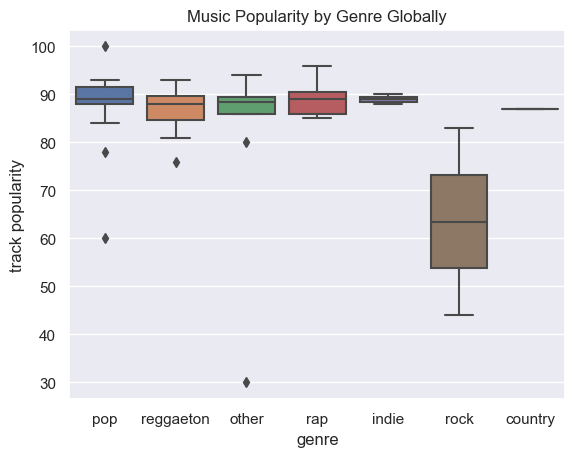

In [392]:
# Seaborn
import seaborn as sns

sns.__version__
sns.boxplot(x=final["genre"],y=final["track popularity"]).set(title="Music Popularity by Genre Globally")
sns.set(font_scale=1)


Given that pop has the highest average track popularity we wanted to plot the frequency of each genre in the top 50 to see if high track popularity wouls also show high frequency. We can see that pop is the highest represented category in the top 50 while country is the lowest. 

[Text(0.5, 1.0, 'Genre Frequency for Top 50 Songs Globally')]

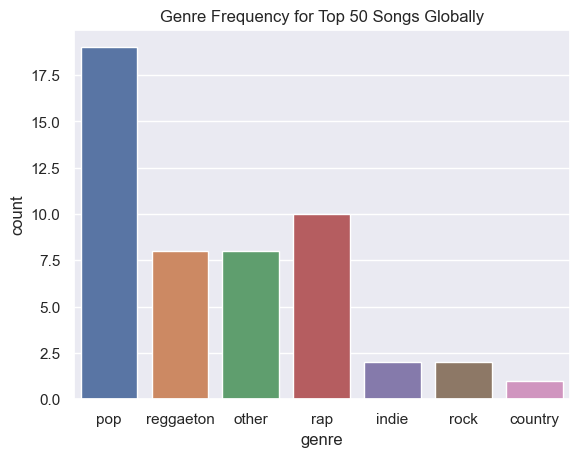

In [393]:
sns.countplot(x=final["genre"]).set(title="Genre Frequency for Top 50 Songs Globally")

The next graph below is a barplot of the audio features that we discussed earlier. To find these bar graphs, we summed up the totals within each category and divided by 50 to find their average across all songs. Globally, we can see that danceability is the top audio feature, on average, found in the top 50 songs. 

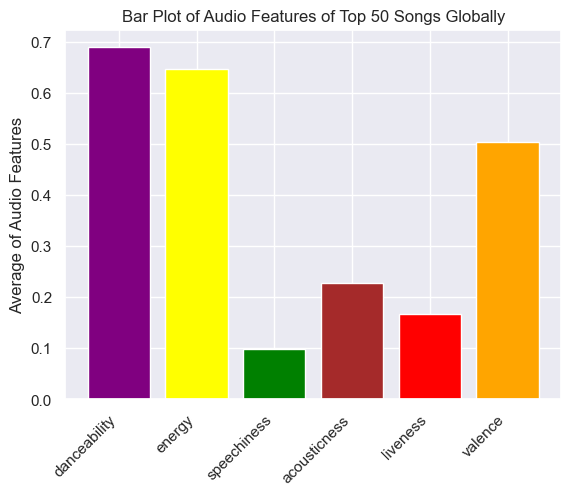

In [382]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


danceability = sum(final['danceability'])/50
energy=sum(final['energy'])/50
speechiness=sum(final['speechiness'])/50
acousticness=sum(final['acousticness'])/50
liveness=sum(final['liveness'])/50
valence=sum(final['valence'])/50

counts=[danceability, energy, speechiness, acousticness, liveness, valence]
qualities=['danceability','energy','speechiness','acousticness','liveness','valence']
ax.bar(qualities, counts, color=['purple', 'yellow', 'green', 'brown', 'red', 'orange']) 
ax.set_xticklabels(qualities, rotation=45, ha='right')


ax.set_ylabel('Average of Audio Features')
ax.set_title('Bar Plot of Audio Features of Top 50 Songs Globally')

plt.show()

## 5) Visulaization and Analysis for US Top 50 

In this section, we repeat the analysis that we did for the global top 50 playlist on the US top 50 playlist. It is important to keep in mind that the US top 50 playlists is updated everyday. The following analysis is based on the top 50 playlist from March 7th, 2023.

In [182]:
us_playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbLRQDuF5jeBp?si=4ee4a04057a74d36"
us_playlist_URI = us_playlist_link.split("/")[-1].split("?")[0]
us_track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(us_playlist_URI)["items"]]


We use the same variables as we did for the global data.

In [183]:
us_track_uri = []
us_track_name = []
us_artist_uris = []
us_artist_name = []
us_artist_pop = []
us_artist_genres = []
us_album = []
us_track_pop = []
for track in sp.playlist_tracks(us_playlist_URI)["items"]:
    #URI
    us_track_uri.append(track["track"]["uri"])
    
    #Track name
    us_track_name.append(track["track"]["name"])
    
    #Main Artist
    us_artist_uris.append(track["track"]["artists"][0]["uri"])
    us_artist_uri=track["track"]["artists"][0]["uri"]
    us_artist_info = sp.artist(us_artist_uri)
    
    #Name, popularity, genre
    us_artist_name.append(track["track"]["artists"][0]["name"])
    us_artist_pop.append(us_artist_info["popularity"])
    us_artist_genres.append(us_artist_info["genres"])
    
    #Album
    us_album.append(track["track"]["album"]["name"])
    
    #Popularity of the track
    us_track_pop.append(track["track"]["popularity"])

We concatenate the desired variables into a data frame.

In [184]:
#gets the top 50 tracks globally with the artist, track popularity, artist popularity, genre, 
#album name, and uri
us_tracks=pd.DataFrame({
    "track name": us_track_name,
    "track popularity": us_track_pop,
    "artist(s)": us_artist_name,
    "artist populatrity": us_artist_pop,
    "genre(s)": us_artist_genres,
    "album name": us_album,
    "uri": us_track_uri
})
us_tracks.head()

,track name,track popularity,artist(s),artist populatrity,genre(s),album name,uri
0,Last Night,76,Morgan Wallen,93,[contemporary country],One Thing At A Time,spotify:track:7K3BhSpAxZBznislvUMVtn
1,Boy's a liar Pt. 2,94,PinkPantheress,85,[],Boy's a liar Pt. 2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv
2,Kill Bill,93,SZA,95,"[pop, r&b]",SOS,spotify:track:1Qrg8KqiBpW07V7PNxwwwL
3,Die For You - Remix,92,The Weeknd,99,"[canadian contemporary r&b, canadian pop, pop]",Die For You (Remix),spotify:track:7oDd86yk8itslrA9HRP2ki
4,Flowers,100,Miley Cyrus,92,[pop],Flowers,spotify:track:0yLdNVWF3Srea0uzk55zFn


Once again, we access the audio features of these top 50 songs that allows us to do analysis on the audio features.

In [185]:
#gets audio features for the top 50 songs using spotipy audio features 
us_var=pd.DataFrame.from_dict(sp.audio_features(us_track_uris))
us_var.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.492,0.675,6,-5.456,1,0.0389,0.4670,0.000000,0.1420,0.478,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4
1,0.696,0.809,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4
2,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
3,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,audio_features,7oDd86yk8itslrA9HRP2ki,spotify:track:7oDd86yk8itslrA9HRP2ki,https://api.spotify.com/v1/tracks/7oDd86yk8its...,https://api.spotify.com/v1/audio-analysis/7oDd...,232857,4
4,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4


Then, we run the spearman correlation to find which audio features seem to be correlated with each other.

In [265]:
us_nums=us_var.iloc[:, : 11]
us_nums= us_nums.drop(columns=['mode', 'key'])

#Use spearman to find correlation based on ranks 
us_nums=us_nums.corr(method = "spearman")
us_nums

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.158730,0.077850,0.431474,-0.049131,-0.294374,-0.089381,0.390135,-0.330228
energy,0.158730,1.000000,0.638479,-0.228209,-0.334750,0.080573,0.051480,0.508728,0.029725
loudness,0.077850,0.638479,1.000000,-0.126780,-0.168788,-0.006807,-0.169756,0.372839,0.104730
speechiness,0.431474,-0.228209,-0.126780,1.000000,-0.116839,-0.350501,-0.047833,0.090335,-0.029294
acousticness,-0.049131,-0.334750,-0.168788,-0.116839,1.000000,-0.082019,-0.065693,-0.203995,0.156591
instrumentalness,-0.294374,0.080573,-0.006807,-0.350501,-0.082019,1.000000,0.118810,-0.198999,0.089260
liveness,-0.089381,0.051480,-0.169756,-0.047833,-0.065693,0.118810,1.000000,0.156702,0.018440
valence,0.390135,0.508728,0.372839,0.090335,-0.203995,-0.198999,0.156702,1.000000,-0.057194
tempo,-0.330228,0.029725,0.104730,-0.029294,0.156591,0.089260,0.018440,-0.057194,1.000000


This first figure is a visual of the the correlations between the audio features for the US top 50 playlist.

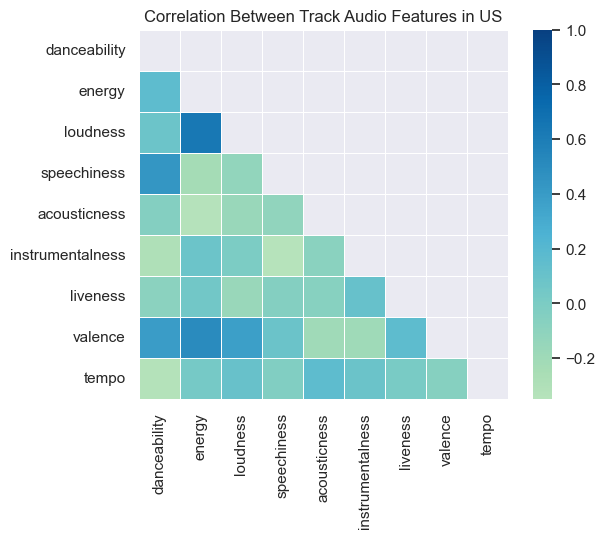

In [366]:
#making a correlation matrix 
sns.set_theme(style="darkgrid", palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
us_corrMatrix = us_nums
sns.heatmap(us_corrMatrix, cmap="GnBu",mask=mask,vmax=1, center=0,
            square=True, linewidths=.5).set(title="Correlation Between Track Audio Features in US");
plt.show()

The following graph is the concatenated dataframe, including the audio features.

In [186]:
#merges the two datasets based on the song uri 
us_final = pd.merge(us_tracks,us_var, how = "left", on = "uri")

#resets the index to start at zero 
us_final.index= us_final.index + 1

#getting rid of columns that are not of interest 
us_final=us_final.drop(['type','id','track_href','analysis_url'],axis=1)
us_final

#indexing based on the current most played tracks in the US
us_final.reset_index(inplace=True)
us_final = us_final.rename(columns = {'index':'US Rank'})
us_final = us_final.set_index("US Rank")
us_final

,track name,track popularity,artist(s),artist populatrity,genre(s),album name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
US Rank,,,,,,,,,,,,,,,,,,,,
1,Last Night,76,Morgan Wallen,93,[contemporary country],One Thing At A Time,spotify:track:7K3BhSpAxZBznislvUMVtn,0.492,0.675,6,-5.456,1,0.0389,0.46700,0.000000,0.1420,0.4780,203.759,163855,4
2,Boy's a liar Pt. 2,94,PinkPantheress,85,[],Boy's a liar Pt. 2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,0.696,0.809,5,-8.254,1,0.0500,0.25200,0.000128,0.2480,0.8570,132.962,131013,4
3,Kill Bill,93,SZA,95,"[pop, r&b]",SOS,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,1,0.0391,0.05210,0.144000,0.1610,0.4180,88.980,153947,4
4,Die For You - Remix,92,The Weeknd,99,"[canadian contemporary r&b, canadian pop, pop]",Die For You (Remix),spotify:track:7oDd86yk8itslrA9HRP2ki,0.531,0.525,1,-6.500,0,0.0671,0.23200,0.000000,0.4410,0.5020,66.900,232857,4
5,Flowers,100,Miley Cyrus,92,[pop],Flowers,spotify:track:0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,200455,4
6,TQG,92,KAROL G,94,"[reggaeton, reggaeton colombiano, urbano latino]",MAÑANA SERÁ BONITO,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,0.720,0.630,4,-3.547,0,0.2770,0.67300,0.000000,0.0936,0.6070,179.974,199440,4
7,One Thing At A Time,74,Morgan Wallen,93,[contemporary country],One Thing At A Time,spotify:track:1rXq0uoV4KTgRN64jXzIxo,0.613,0.914,7,-5.153,1,0.0300,0.00522,0.000002,0.2600,0.9160,141.978,206865,4
8,Thinkin’ Bout Me,76,Morgan Wallen,93,[contemporary country],One Thing At A Time,spotify:track:0PAcdVzhPO4gq1Iym9ESnK,0.656,0.757,3,-5.775,0,0.0308,0.49200,0.000000,0.1170,0.4290,139.971,177388,4
9,Ain’t That Some,77,Morgan Wallen,93,[contemporary country],One Thing At A Time,spotify:track:2YVlDlk2zRceefo6XlC6DX,0.641,0.803,6,-5.781,0,0.0286,0.00232,0.000004,0.3610,0.6710,121.086,158004,4


Next, we created the same frequency plot for the US top 50 playlist.

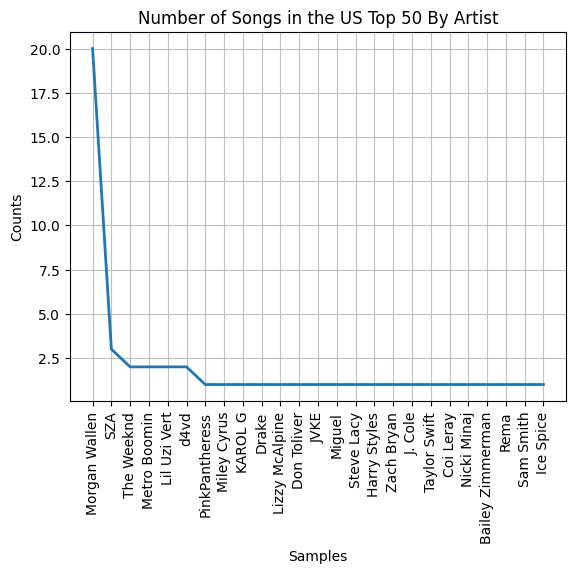

AxesSubplot(0.125,0.11;0.775x0.77)


In [187]:
import nltk
us_art=us_final["artist(s)"]

#plotting the frequency of the words in the first 20 sentences
us_frequency= nltk.FreqDist(name for name in us_art)
%matplotlib inline

#printing out the frequency of the top 50 words used, every other word is only used once 
print(us_frequency.plot(title='Number of Songs in the US Top 50 By Artist'))

The results of this frequency plot was quite different from that of the global playlist. In this frequency plot, we see that Morgan Wallen has the most songs in the US top 50 by a landslide. In the global playlist, the artist with the most songs only had 3 songs. Here we can see that Morgan Wallen has upwards of 20. The next artist with the most songs has only 3. Within this top 50 playlist, there are 25 unique artists.

In [201]:
#There are 25 different artists that have songs in the US top 50
print(len(us_final["artist(s)"].unique()))

25


Just as we did for the Global top 50 playlist, we also did genre analysis for the US top 50 playlist. The figure below provides a series of boxplots for each genre that represent the genre population based on track listens/track popularity. 

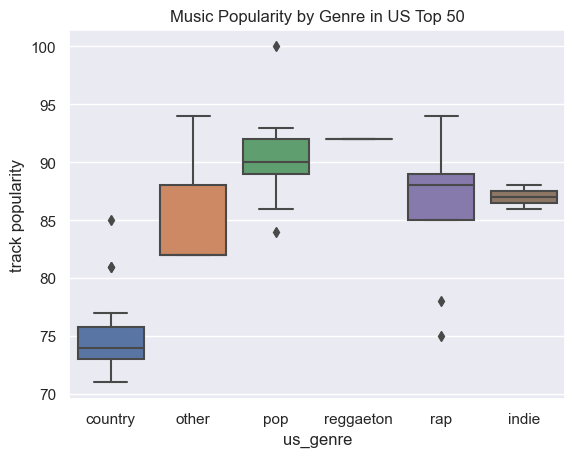

In [349]:
us_genre=simplify_genre(list(us_final['genre(s)']))
us_final["us_genre"] = us_genre

# Seaborn
import seaborn as sns

sns.__version__
sns.boxplot(x=us_final["us_genre"],y=us_final["track popularity"]).set(title="Music Popularity by Genre in US Top 50")
sns.set(font_scale=1)


This next plot is a genre frequency bar plot. This shows the representation of genre within the US top 50 playlist.

[Text(0.5, 1.0, 'Genre Frequency for Top 50 US Songs')]

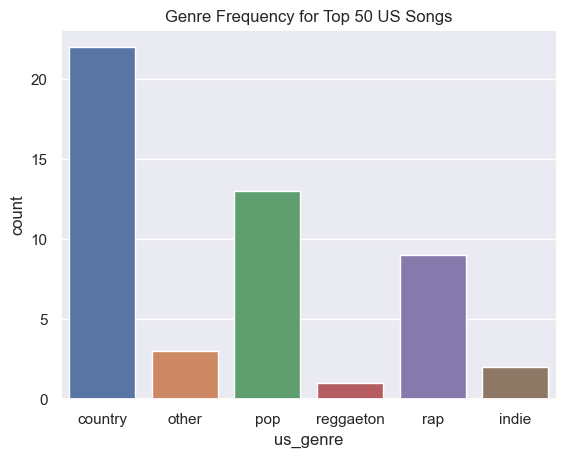

In [394]:
sns.countplot(x=us_final["us_genre"]).set(title="Genre Frequency for Top 50 US Songs")

Our US top 50 genre analysis was quite interesting and displayed an interesting discrepancy. While in the global data the genre frequency plot and the music popularity by genre were consistent with each other, this is not the case for the US top 50. In our genre frequency barplot, we can see that country is by far the most represented genre within the US top 50 playlist. This is to be expected with Morgan Wallen, a country artist, having upwards of 20 songs in the top 50. However, when looking at the box plot graph, we can see that country is actually the least popular based off of track popularity. Based on track popularity (the boxplots), we can see that pop is the most popular genre based on track listens. This observation is most likely due to the fact that track popularity accounts for total listens. Since Morgan Wallens top songs are all from his newly released album, many of these songs have lots of current listens, but have not had time to accumulate high total listens like a song that was released a few months ago may have. This is an important discovery as it shows that current popular songs can be affected by how recent an artist has dropped an album or how popular an artist is in this current day. This is exactly the case. Morgan Wallen recently dropped the new album days before the analysis, so it is to be expected that his music would be heavily listened to.

Lastly, we created a bar plot for the audio features in the US top 50 playlist.

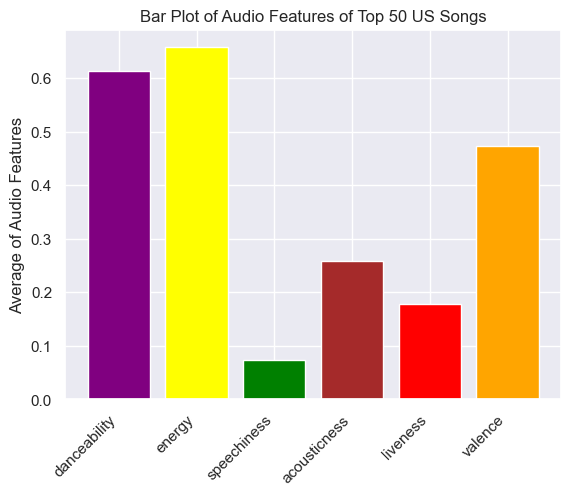

In [383]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


danceability = sum(us_final['danceability'])/50
energy=sum(us_final['energy'])/50
speechiness=sum(us_final['speechiness'])/50
acousticness=sum(us_final['acousticness'])/50
liveness=sum(us_final['liveness'])/50
valence=sum(us_final['valence'])/50

counts=[danceability, energy, speechiness, acousticness, liveness, valence]
qualities=['danceability','energy','speechiness','acousticness','liveness','valence']
ax.bar(qualities, counts, color=['purple', 'yellow', 'green', 'brown', 'red', 'orange']) 
ax.set_xticklabels(qualities, rotation=45, ha='right')


ax.set_ylabel('Average of Audio Features')
ax.set_title('Bar Plot of Audio Features of Top 50 US Songs' )

plt.show()

We can see that danceability and energy are the audio features that, on average, characterize the music in the US top 50 most.

## 6) Personal Analysis 

When we first started our project, we wanted to compare our own top songs on our spotify accounts to those on the top 50 playlists to see if our current music tastes were similar. We ran into trouble obtaining personal uri's to access our personalized data before our presentation. We were finally able to gain access, but it only allowed us to use one current user account. We also were not able to figure out how to get the genre of the songs. However, since this is a personalized current top songs list, we were able to determine that all of the songs were either country or slow classical background music. The user was able to quantify the popularity of these songs because as finals week has been approaching, many of these songs are what is listend to while studying on the large numer of rainy days Davis has been experiencing. These findings made us realize how much a users current popular songs can change throughout different periods in their life and how weather and seasons can also influence music choices. 

In [19]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

CLIENT_ID = '9b436bfad3ef429d924e3d07fdad8d74'
CLIENT_SECRET = '3efb51b6ffb346889d452f04a5af36e0'

scopes = ["user-follow-read", 'ugc-image-upload', 'user-read-playback-state',
          'user-modify-playback-state', 'user-read-currently-playing', 'user-read-private',
          'user-read-email', 'user-follow-modify', 'user-follow-read', 'user-library-modify',
          'user-library-read', 'streaming', 'app-remote-control', 'user-read-playback-position',
          'user-top-read', 'user-read-recently-played', 'playlist-modify-private', 'playlist-read-collaborative',
          'playlist-read-private', 'playlist-modify-public']

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri='http://127.0.0.1:5000',
                                               scope=scopes))

import pandas
songs = pandas.DataFrame(sp.current_user_top_tracks()['items'])
songs[['name','popularity','uri']]

,name,popularity,uri
0,Something in the Orange,86,spotify:track:3WMj8moIAXJhHsyLaqIIHI
1,Work Music,29,spotify:track:4LM1fJ0uB1jswr8gTNrnWb
2,Traveller,67,spotify:track:178OI1A3qjROeFeh8lmNwW
3,A Woman Like You,57,spotify:track:3oyMHCAAcnWFdcGuVgwfhd
4,sun and moon,70,spotify:track:769Ld8demNhMgVLAQcjTDn
5,'Til You Can't,73,spotify:track:4k3lPl8YTKuY8c1HelVnm3
6,No Hard Feelings,64,spotify:track:3YaycOQk7PoQpl7YdvmWdX
7,Reading and Studying,17,spotify:track:7bGszKbbvXA8C2dkJULtBd
8,That Old Truck,44,spotify:track:0kjnvAqQvdjN69aDTGlceq
9,Office Music,25,spotify:track:0hrtwojDe8qHrsvvnSroTU


## 7) Conclusion and Discussion 

In [269]:
#Finding track names that appear in both the global top 50 and the US top 50
a=final["track name"]
b=us_final["track name"]
s = set(b)
sim = [x for x in a if x in s]
print(sim)
len(sim)

['Flowers', 'TQG', 'Die For You - Remix', 'Kill Bill', "Boy's a liar Pt. 2", "Creepin' (with The Weeknd & 21 Savage)", 'As It Was', 'Unholy (feat. Kim Petras)', 'Calm Down (with Selena Gomez)', 'Die For You', 'Anti-Hero', 'Here With Me', 'golden hour', 'Players', 'Sure Thing', 'Snooze', 'Just Wanna Rock', 'Last Night', 'Rich Flex']


19

In [202]:
##Finding artists that have songs in both the global top 50 and the US top 50
c=final["artist(s)"]
d=us_final["artist(s)"]
se = set(d)
sim_art = [x for x in c if x in se]
print(sim_art)
print(len(sim_art))

#22 artists have songs in the global and US top 50 

['Miley Cyrus', 'KAROL G', 'The Weeknd', 'SZA', 'PinkPantheress', 'Metro Boomin', 'Harry Styles', 'Sam Smith', 'Rema', 'KAROL G', 'The Weeknd', 'Taylor Swift', 'd4vd', 'JVKE', 'The Weeknd', 'Coi Leray', 'Miguel', 'SZA', 'Lil Uzi Vert', 'Morgan Wallen', 'Drake', 'KAROL G']
22


#### Recap of our findings/analysis:
Overall, there were only 19 songs that appeared in both the Global and US top 50 spotify playlists. Additionally, only 22 artists appeared in both the global and US top 50. Given that both of these account for less than 50% of the total songs, we can conclude that there is a difference in the current top songs globally and in the US. 

When looking at audio features to determine what factors make songs popular, danceability and energy were among the top two globally and in the US. In the US, the higest audio feature was energy while globally it was danceability. On average pop and reggatone music had the highest danceability scores and since these genres were more present globally, danceability was the highest audio feature. Dancability and speachiness and energy and loudness were the audio features of songs that were the most correlated. 

KAROL G currently has the most songs in the global top 50 while Morgan Wallen has the most in the United States. Globally, pop is the most popular genre amount the top 50 and also has the highest average song popularity score. In the US, country is the most frequent genre but has the lowest average popularity score most likely due to the fact of the recency of Morgan Wallen's new album. The songs have not had enough time to accumulate total listens which is factored into the determination of the track popularity score. 

#### Limitations to our research: 
While we were successful in answering our research questions, we did face some limitations that hindered our creativity that we originally were hoping to implement. For exmample, we were interested in analyzing the difference in music taste by age group or by city. For example, would their be differences in the music tastes between Davis, a college town, and Sacramento, a town with more diverse demographics? However, the spotipy package did not provide locations and age groups of listeners, which made this kind of analysis hard out of reach. We also faced limitations in our audio feature analysis. We chose to use the audio features that we measured on the same scale. However, we struggled to impliment the other audio features in our research. 

#### Taking our research further:
One way we hope to advance our project is by running more analysis on our own top songs to compare to the global and US top 50 playlists. By looking at the personal analysis playlist, we realized how much the season and peoples day to day schedule influence their music choices. Since spotify updates the global playlist weekly and the US playlist daily, we would also be curious to re-run our analysis in different seasons to see if results change/remain consistent. For example, do more slow christmas songs enter the top 50 during winter time opposed to the summer when more upbeat songs may overtake the top 50?  

## 8) References 

Web API reference: Spotify for developers. Home. (n.d.). Retrieved February 25, 2023, from
     https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track 

Welcome to spotipy!¶. Welcome to Spotipy! - spotipy 2.0 documentation. (n.d.). Retrieved
    February 25, 2023, from https://spotipy.readthedocs.io/en/2.16.1/#module-spotipy.oauth2 

